In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


### Investigate the data

In [3]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df = pd.read_csv("/home/cacaprog/learning-projects/flags-decision-trees/flag.data", names = cols)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
df.describe(include="all")

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,red
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,69
mean,NaN,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,NaN,NaN
std,NaN,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [6]:
df.landmass.value_counts(normalize=True)

4    0.268041
5    0.201031
3    0.180412
1    0.159794
6    0.103093
2    0.087629
Name: landmass, dtype: float64

2. Rather than looking at all six continents, we will focus on just two, Europe and Oceania.

In [7]:
# Create a new dataframe with 2 continents
eurania = df[df['landmass'].isin([3,6])].copy()

In [8]:
eurania.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red


3. Given the list of predictors in the list var, print the average values of each for these two continents. Note which predictors have very different averages.

In [9]:
# variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white'
       ,'black', 'orange', 'mainhue','bars'
       ,'stripes', 'circles','crosses', 'saltires'
       ,'quarters','sunstars','triangle','animate']

# The average value for each var, grouped by continent
eurania.groupby('landmass')[var].mean()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


4. We will build a classifier to distinguish flags for these two continents – but first, inspect the variable types for each of the predictors.

In [10]:
eurania[var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 190
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   red       55 non-null     int64 
 1   green     55 non-null     int64 
 2   blue      55 non-null     int64 
 3   gold      55 non-null     int64 
 4   white     55 non-null     int64 
 5   black     55 non-null     int64 
 6   orange    55 non-null     int64 
 7   mainhue   55 non-null     object
 8   bars      55 non-null     int64 
 9   stripes   55 non-null     int64 
 10  circles   55 non-null     int64 
 11  crosses   55 non-null     int64 
 12  saltires  55 non-null     int64 
 13  quarters  55 non-null     int64 
 14  sunstars  55 non-null     int64 
 15  triangle  55 non-null     int64 
 16  animate   55 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 7.7+ KB


5. Note that all the predictor variables are numeric except for mainhue. Transform the dataset of predictor variables to dummy variables and save this in a new dataframe called data.

In [11]:
eurania.mainhue.head()

1      red
3     blue
4     gold
10    blue
11     red
Name: mainhue, dtype: object

In [12]:
data = pd.get_dummies(eurania[var])
data.columns

Index(['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'bars',
       'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars',
       'triangle', 'animate', 'mainhue_black', 'mainhue_blue', 'mainhue_gold',
       'mainhue_green', 'mainhue_red', 'mainhue_white'],
      dtype='object')

In [13]:
data.head()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,quarters,sunstars,triangle,animate,mainhue_black,mainhue_blue,mainhue_gold,mainhue_green,mainhue_red,mainhue_white
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,1,0,1,1,0,0,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10,1,0,1,0,1,0,0,0,0,0,...,1,6,0,0,0,1,0,0,0,0
11,1,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0


### Run the model
6. Split the data into a train and test set.

In [73]:
# split the data
X = data
y = eurania['landmass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

7. explore tuning the decision tree model by testing the performance over a range of max_depth values

In [74]:
acc_depth = []
depth_range = range(1, 21)


for i in depth_range:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_depth.append([accuracy_score(y_test, y_pred)])

acc_depth


[[0.8235294117647058],
 [0.8235294117647058],
 [0.8235294117647058],
 [0.8235294117647058],
 [0.7647058823529411],
 [0.8235294117647058],
 [0.8235294117647058],
 [0.7058823529411765],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.7058823529411765],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118],
 [0.6470588235294118]]

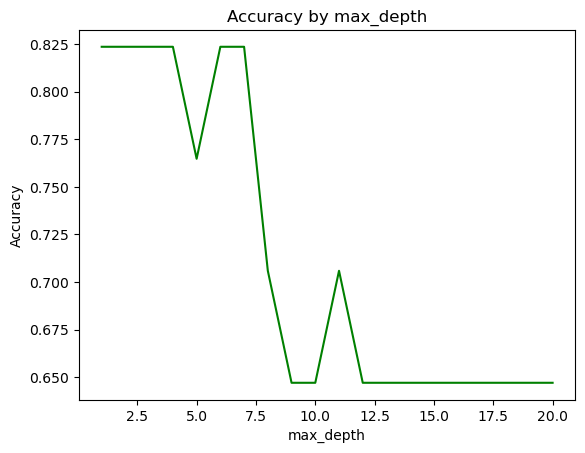

In [75]:
plt.plot(depth_range, acc_depth, color='green')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy by max_depth')
plt.show()

The best accuracy is with max_depth between 1 and 2

In [72]:
dt = DecisionTreeClassifier(max_depth = 1, criterion = 'gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8235294117647058

10. Plot the decision tree

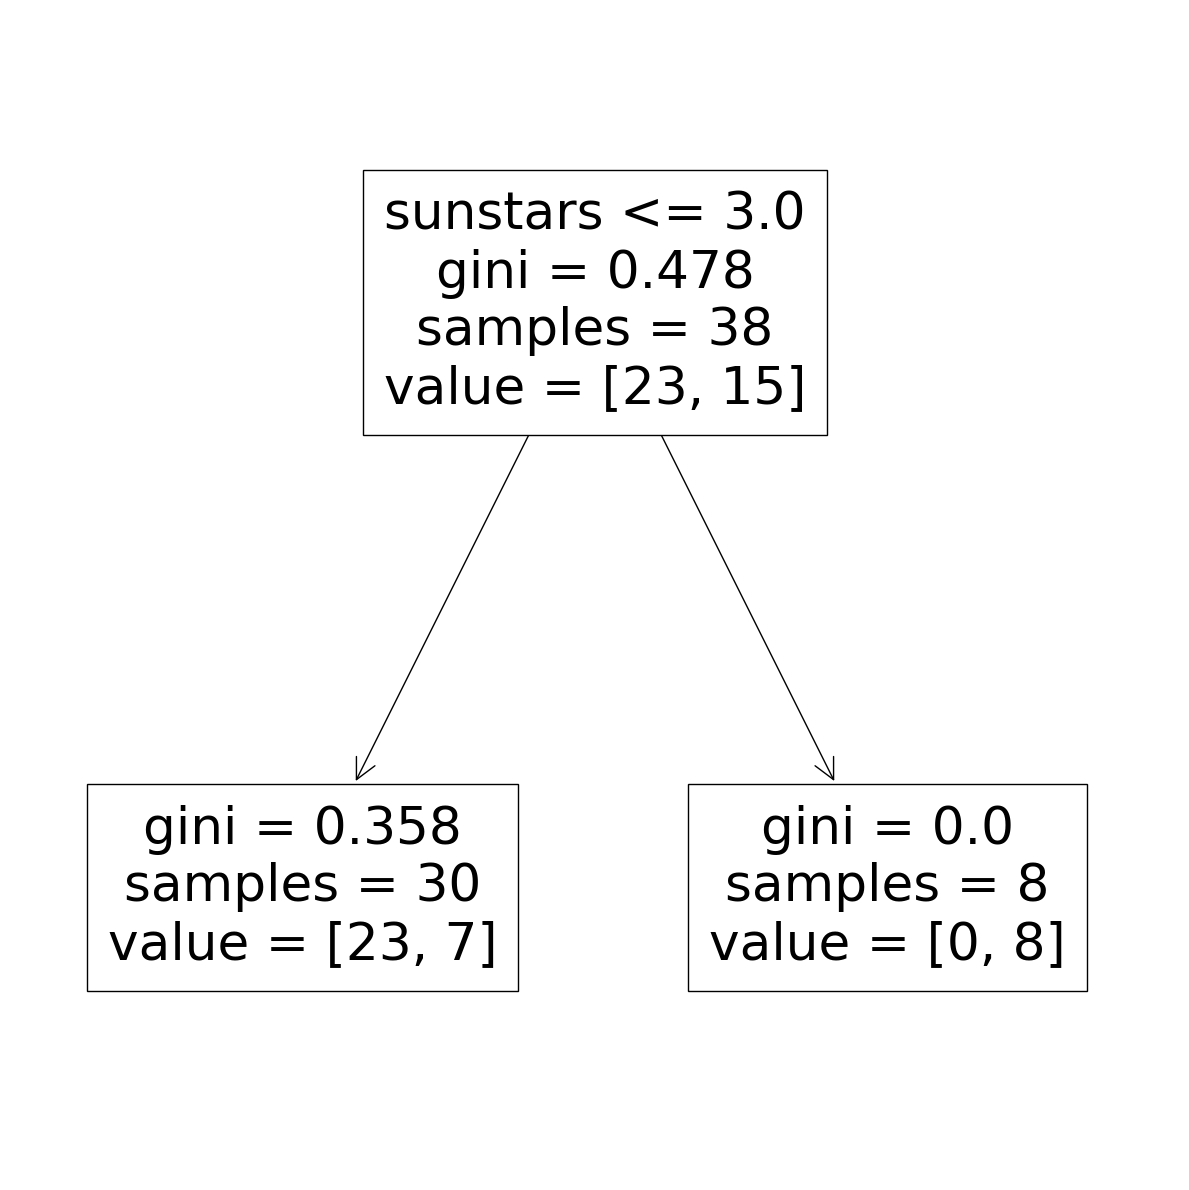

In [33]:
plt.figure(figsize=(12, 12))
tree.plot_tree(dt, feature_names = X_train.columns)
plt.tight_layout()
plt.show()

In [32]:
feature_names = X_train.columns.tolist()
print(tree.export_text(dt, feature_names=feature_names))

|--- sunstars <= 3.00
|   |--- class: 3
|--- sunstars >  3.00
|   |--- class: 6



### Tune Decision Tree Classifiers by Pruning
11. we will now tune the tree by using the hyperparameter ccp_alpha, which is a pruning parameter.

In [68]:
acc_pruned = []
ccp_test = np.arange(0, 5, .5)

for c in ccp_test:
    dt_tuned = DecisionTreeClassifier(max_depth = 1, ccp_alpha=c, criterion = 'gini')
    dt_tuned.fit(X_train, y_train)
    y_pred = dt_tuned.predict(X_test)
    # print the accuracy for each ccp_alpha value
    accuracy = accuracy_score(y_test, y_pred)
    print(f'ccp_alpha = {c}: Accuracy = {accuracy}')


ccp_alpha = 0.0: Accuracy = 0.8235294117647058
ccp_alpha = 0.5: Accuracy = 0.7058823529411765
ccp_alpha = 1.0: Accuracy = 0.7058823529411765
ccp_alpha = 1.5: Accuracy = 0.7058823529411765
ccp_alpha = 2.0: Accuracy = 0.7058823529411765
ccp_alpha = 2.5: Accuracy = 0.7058823529411765
ccp_alpha = 3.0: Accuracy = 0.7058823529411765
ccp_alpha = 3.5: Accuracy = 0.7058823529411765
ccp_alpha = 4.0: Accuracy = 0.7058823529411765
ccp_alpha = 4.5: Accuracy = 0.7058823529411765


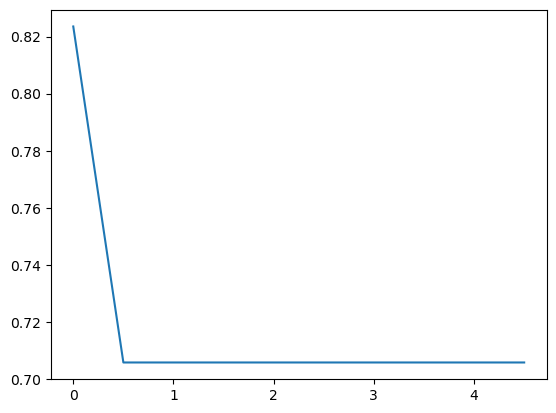

In [50]:
plt.plot(ccp_test, acc_pruned)
plt.show()

In [55]:
print(ccp_test)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [58]:
acc_pruned

[0.8235294117647058,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765]

In [59]:
dt_tuned = DecisionTreeClassifier(max_depth = 1, ccp_alpha=0, criterion = 'gini')
dt_tuned.fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8235294117647058